In [1]:
import pandas as pd
import numpy as np
# Read the dataset 
df = pd.read_csv('breast-cancer-wisconsin.csv')

# View the first few rows of the dataframe
df


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [2]:
df.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [3]:
df.nunique()

Sample code number             645
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     11
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

In [4]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
df.drop('Sample code number',1,inplace=True)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_19552\3741410793.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Sample code number',1,inplace=True)


In [7]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [8]:
cat_cols=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']

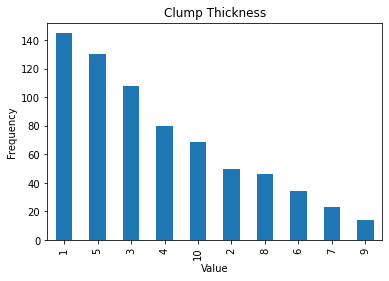

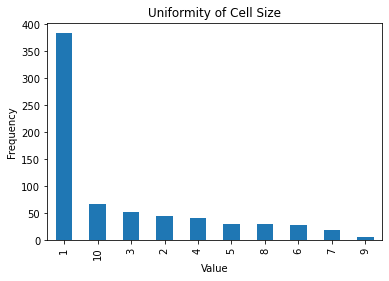

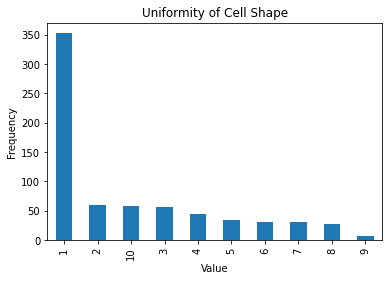

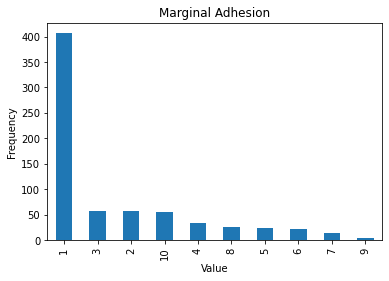

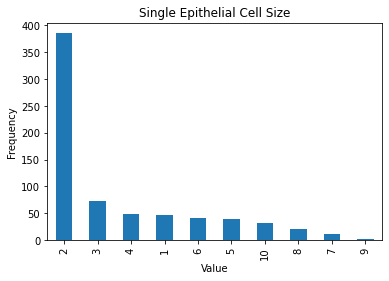

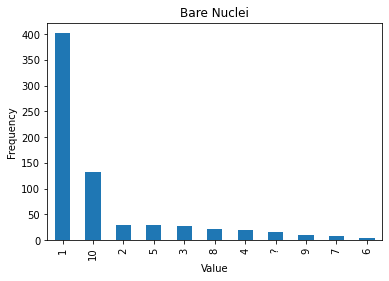

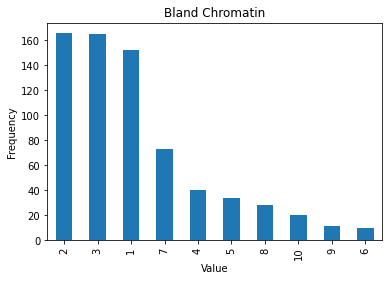

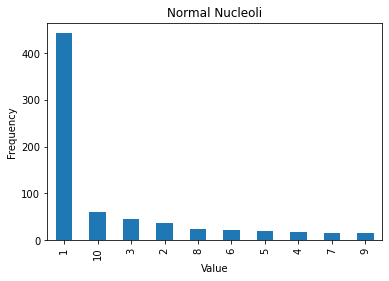

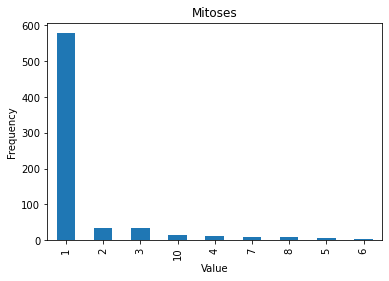

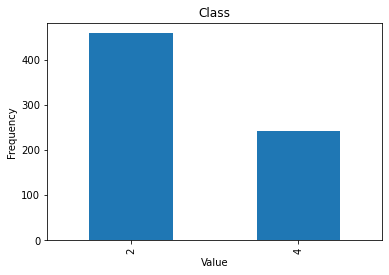

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.show()

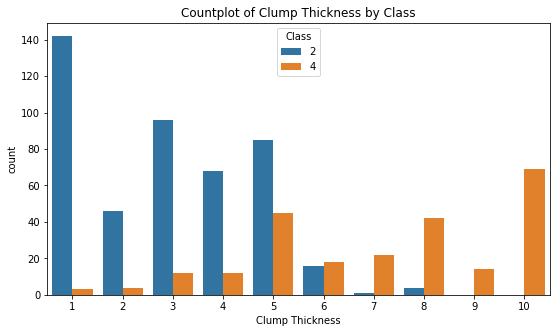

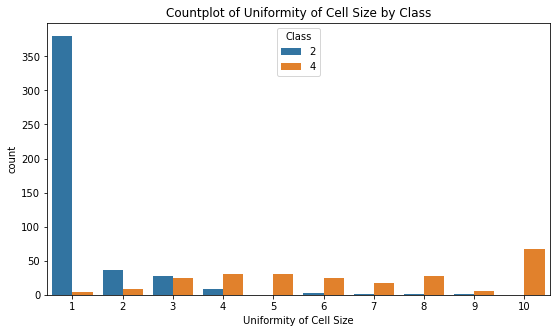

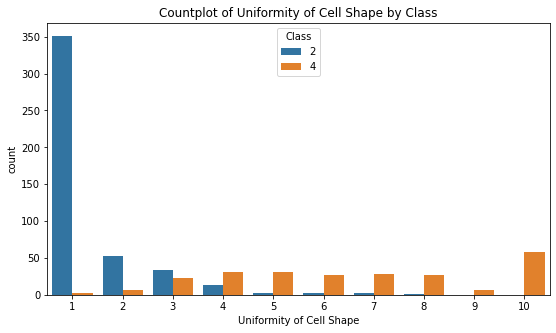

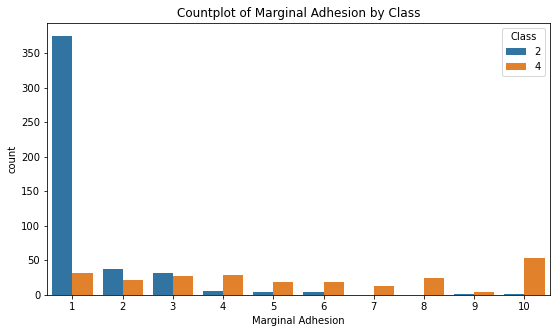

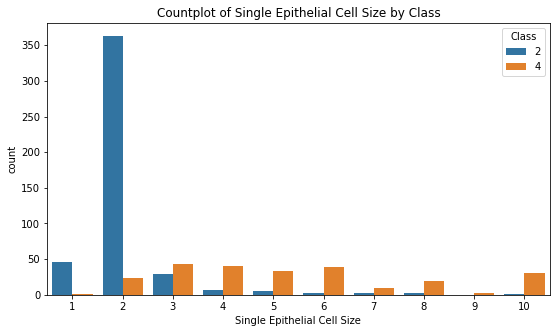

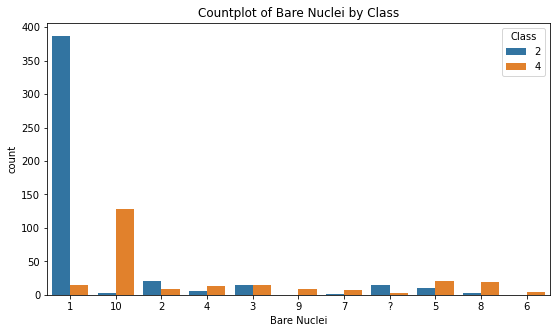

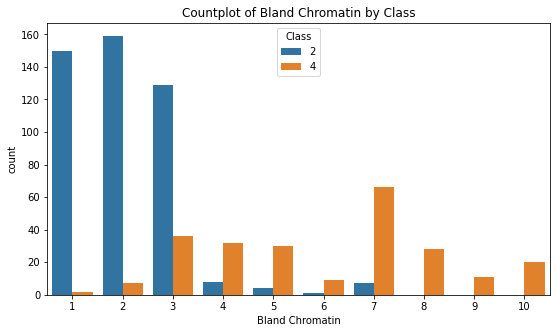

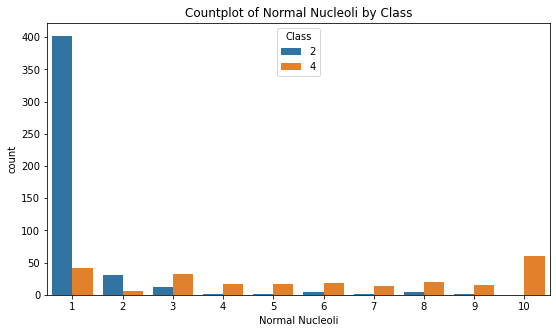

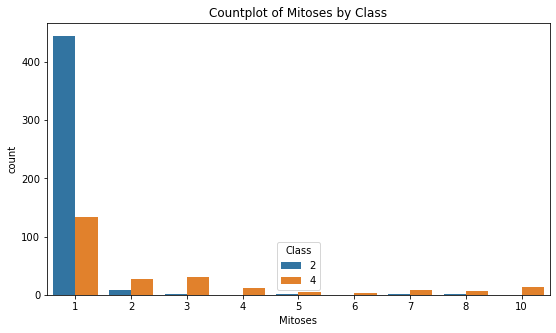

In [10]:
for name in cat_cols:
    plt.figure(figsize=(9,5))
    sns.countplot(x=name, data=df,hue="Class").set_title("Countplot of {} by Class".format(name))
    plt.show()

In [11]:
def ohe(data,cat_cols):
    for column in cat_cols:
        for i in data[f'{column}'].unique():
            data[f'{column}_{i}']=np.where(data[f'{column}']==i,1,0)
        data=data.drop(column,1)
    return data


In [12]:
data=ohe(df,cat_cols)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_19552\3039935407.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(column,1)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_19552\3039935407.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(column,1)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_19552\3039935407.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(column,1)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_19552\3039935407.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(column,1)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_19552\3039935407.py:5: FutureWarning: In a

In [13]:
data['Class']=np.where(data['Class']==2,0,1)

In [14]:
from sklearn.model_selection import train_test_split
X=data.drop('Class',1)
y=data['Class']
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.25,shuffle=True)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_19552\219094764.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Class',1)


In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(524, 90)
(175, 90)
(524,)
(175,)


In [16]:
import numpy as np
import pandas as pd

class decision:
    def __init__(self, max_depth=None):
        self.tree = {}
        self.route = []
        self.max_depth = max_depth

    def chisquare(self, x, column1, y):
        df = x.copy()
        df['target'] = y
        target = 'target'
        ct = pd.crosstab(df[f'{column1}'], df['target'])
        ct['total'] = [0 for j in range(0, len(ct))]
        for i in list(ct.columns):
            ct['total'] += ct[i]
        ct["expected"] = ct['total'] / 2
        ct["chisquare_0"] = np.sqrt(((ct[0] - ct['expected']) ** 2) / ct['expected'])
        ct["chisquare_1"] = np.sqrt(((ct[1] - ct['expected']) ** 2) / ct['expected'])
        return ct

    def best_feature(self, x, y, bf=''):
        df = x.copy()
        df['target'] = y
        target = 'target'
        chi2 = {}
        listofcolumns = list(df.columns)
        listofcolumns.remove(target)
        if bf not in listofcolumns:
            listofcolumns = listofcolumns
        elif bf in listofcolumns:
            listofcolumns.remove(bf)
        for i in listofcolumns:
            a = pd.DataFrame(self.chisquare(x, i, y))
            chi2[i] = np.sum(a['chisquare_0'] + a['chisquare_1'])
        if not chi2:
            return None
        feature = pd.DataFrame(chi2, index=['chi2']).T
        return feature['chi2'].idxmax()

    def split(self, x, y, path=None, depth=0):
        df = x.copy()
        df['target'] = y
        target = 'target'
        if path is None:
            path = []
        bf = self.best_feature(x, y)
        if bf is None or (self.max_depth is not None and depth >= self.max_depth):
            # If no best feature is found or the max depth is reached, return the majority class of the parent node
            majority_class = df[target].mode()[0]
            self.route.append((path, majority_class))
            print(f"{path} : {majority_class}")
            return self.route
        for i in df[bf].unique():
            branch = f"{bf}->{i}"
            current_path = path + [branch]
            if df[df[bf] == i][target].nunique() == 1:
                decision = df[df[bf] == i][target].unique()[0]
                self.route.append((current_path, decision))
                print(f"{current_path} : {decision}")
            else:
                sub_df = df[df[bf] == i].drop(bf, axis=1)
                if sub_df.empty:
                    # If the sub-dataset is empty, return the majority class of the parent node
                    majority_class = df[target].mode()[0]
                    self.route.append((current_path, majority_class))
                    print(f"{current_path} : {majority_class}")
                else:
                    self.tree[branch] = sub_df
                    self.split(self.tree[branch], sub_df[target], current_path, depth+1)
        return self.route


    def predict(self, x):
        predictions = []
        for i, row in x.iterrows():
            for path, decision in self.route:
                a = 0
                for branch in path:
                    col, val = branch.split('->')
                    if str(row[col]) != val:
                        a = 1
                        break
                if a == 0:
                    predictions.append(decision)
                    break
            else:
                counts = {}
                for path, decision in self.route:
                    last_branch = path[-1]
                    _, last_val = last_branch.split('->')
                    if last_val not in counts:
                        counts[last_val] = 0
                    counts[last_val] += 1
                mode = max(counts, key=counts.get)
                predictions.append(mode)
        return predictions

In [17]:
a=decision()
a.split(x=X_train,y=y_train)

['Uniformity of Cell Shape_1->1', 'Bland Chromatin_2->1', 'Clump Thickness_1->0', 'Clump Thickness_3->0', 'Clump Thickness_4->0'] : 0
['Uniformity of Cell Shape_1->1', 'Bland Chromatin_2->1', 'Clump Thickness_1->0', 'Clump Thickness_3->0', 'Clump Thickness_4->1', 'Marginal Adhesion_1->1'] : 0
['Uniformity of Cell Shape_1->1', 'Bland Chromatin_2->1', 'Clump Thickness_1->0', 'Clump Thickness_3->0', 'Clump Thickness_4->1', 'Marginal Adhesion_1->0', 'Marginal Adhesion_3->1', 'Bare Nuclei_1->0'] : 1
['Uniformity of Cell Shape_1->1', 'Bland Chromatin_2->1', 'Clump Thickness_1->0', 'Clump Thickness_3->0', 'Clump Thickness_4->1', 'Marginal Adhesion_1->0', 'Marginal Adhesion_3->1', 'Bare Nuclei_1->1'] : 0
['Uniformity of Cell Shape_1->1', 'Bland Chromatin_2->1', 'Clump Thickness_1->0', 'Clump Thickness_3->0', 'Clump Thickness_4->1', 'Marginal Adhesion_1->0', 'Marginal Adhesion_3->0'] : 0
['Uniformity of Cell Shape_1->1', 'Bland Chromatin_2->1', 'Clump Thickness_1->0', 'Clump Thickness_3->1'] : 

['Uniformity of Cell Shape_1->0', 'Bare Nuclei_10->0', 'Marginal Adhesion_1->0', 'Mitoses_1->1', 'Normal Nucleoli_1->0', 'Bland Chromatin_7->0', 'Bare Nuclei_1->0', 'Clump Thickness_5->0', 'Uniformity of Cell Size_8->1'] : 1
['Uniformity of Cell Shape_1->0', 'Bare Nuclei_10->0', 'Marginal Adhesion_1->0', 'Mitoses_1->1', 'Normal Nucleoli_1->0', 'Bland Chromatin_7->0', 'Bare Nuclei_1->0', 'Clump Thickness_5->0', 'Uniformity of Cell Size_8->0', 'Bland Chromatin_4->0'] : 1
['Uniformity of Cell Shape_1->0', 'Bare Nuclei_10->0', 'Marginal Adhesion_1->0', 'Mitoses_1->1', 'Normal Nucleoli_1->0', 'Bland Chromatin_7->0', 'Bare Nuclei_1->0', 'Clump Thickness_5->0', 'Uniformity of Cell Size_8->0', 'Bland Chromatin_4->1', 'Clump Thickness_3->1', 'Uniformity of Cell Size_4->0'] : 1
['Uniformity of Cell Shape_1->0', 'Bare Nuclei_10->0', 'Marginal Adhesion_1->0', 'Mitoses_1->1', 'Normal Nucleoli_1->0', 'Bland Chromatin_7->0', 'Bare Nuclei_1->0', 'Clump Thickness_5->0', 'Uniformity of Cell Size_8->0', 

['Uniformity of Cell Shape_1->0', 'Bare Nuclei_10->0', 'Marginal Adhesion_1->1', 'Uniformity of Cell Size_1->0', 'Bare Nuclei_1->1', 'Uniformity of Cell Size_2->0', 'Clump Thickness_5->0', 'Clump Thickness_4->0', 'Clump Thickness_3->0'] : 1
['Uniformity of Cell Shape_1->0', 'Bare Nuclei_10->0', 'Marginal Adhesion_1->1', 'Uniformity of Cell Size_1->0', 'Bare Nuclei_1->1', 'Uniformity of Cell Size_2->0', 'Clump Thickness_5->0', 'Clump Thickness_4->0', 'Clump Thickness_3->1'] : 0
['Uniformity of Cell Shape_1->0', 'Bare Nuclei_10->0', 'Marginal Adhesion_1->1', 'Uniformity of Cell Size_1->0', 'Bare Nuclei_1->1', 'Uniformity of Cell Size_2->0', 'Clump Thickness_5->1', 'Uniformity of Cell Size_3->0', 'Uniformity of Cell Size_4->1'] : 0
['Uniformity of Cell Shape_1->0', 'Bare Nuclei_10->0', 'Marginal Adhesion_1->1', 'Uniformity of Cell Size_1->0', 'Bare Nuclei_1->1', 'Uniformity of Cell Size_2->0', 'Clump Thickness_5->1', 'Uniformity of Cell Size_3->0', 'Uniformity of Cell Size_4->0'] : 1
['Un

[(['Uniformity of Cell Shape_1->1',
   'Bland Chromatin_2->1',
   'Clump Thickness_1->0',
   'Clump Thickness_3->0',
   'Clump Thickness_4->0'],
  0),
 (['Uniformity of Cell Shape_1->1',
   'Bland Chromatin_2->1',
   'Clump Thickness_1->0',
   'Clump Thickness_3->0',
   'Clump Thickness_4->1',
   'Marginal Adhesion_1->1'],
  0),
 (['Uniformity of Cell Shape_1->1',
   'Bland Chromatin_2->1',
   'Clump Thickness_1->0',
   'Clump Thickness_3->0',
   'Clump Thickness_4->1',
   'Marginal Adhesion_1->0',
   'Marginal Adhesion_3->1',
   'Bare Nuclei_1->0'],
  1),
 (['Uniformity of Cell Shape_1->1',
   'Bland Chromatin_2->1',
   'Clump Thickness_1->0',
   'Clump Thickness_3->0',
   'Clump Thickness_4->1',
   'Marginal Adhesion_1->0',
   'Marginal Adhesion_3->1',
   'Bare Nuclei_1->1'],
  0),
 (['Uniformity of Cell Shape_1->1',
   'Bland Chromatin_2->1',
   'Clump Thickness_1->0',
   'Clump Thickness_3->0',
   'Clump Thickness_4->1',
   'Marginal Adhesion_1->0',
   'Marginal Adhesion_3->0'],
  

In [18]:
y_pred=a.predict(X_train)

y_test_pred=a.predict(X_test)

train_accuracy = np.mean(y_pred == y_train)
print(f"train Accuracy: {train_accuracy:.2%}")

train Accuracy: 100.00%


In [19]:
test_accuracy = np.mean(y_test_pred == y_test)
print(f"test Accuracy: {test_accuracy:.2%}")

test Accuracy: 93.71%
